<a href="https://colab.research.google.com/github/chemtrailsx/formatrix/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/chemtrailsx/formatrix/main/bank-churn.csv
import pandas as pd
df = pd.read_csv('bank-churn.csv')
print(df.head())


--2024-11-03 04:43:38--  https://raw.githubusercontent.com/chemtrailsx/formatrix/main/bank-churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 635952 (621K) [text/plain]
Saving to: ‘bank-churn.csv’

bank-churn.csv      100%[===================>] 621.05K  --.-KB/s    in 0.007s  

2024-11-03 04:43:38 (91.3 MB/s) - ‘bank-churn.csv’ saved [635952/635952]

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Femal

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
df.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape


(10000, 13)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

age_outliers = detect_outliers_iqr(df, 'Age')

print("Outliers in 'Age' column:")
print(age_outliers[['Age']])


Outliers in 'Age' column:
      Age
58     66
85     75
104    65
158    73
181    65
...   ...
9753   68
9765   64
9832   64
9894   77
9936   77

[359 rows x 1 columns]


In [ ]:
url = 'https://raw.githubusercontent.com/chemtrailsx/formatrix/main/bank-churn.csv'
df = pd.read_csv(url)


def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

salary_outliers = detect_outliers_iqr(df, 'EstimatedSalary')

credit_score_outliers = detect_outliers_iqr(df, 'CreditScore')

print("Outliers in 'EstimatedSalary' column:")
print(salary_outliers[['EstimatedSalary']])

print("\nOutliers in 'CreditScore' column:")
print(credit_score_outliers[['CreditScore']])


Outliers in 'EstimatedSalary' column:
Empty DataFrame
Columns: [EstimatedSalary]
Index: []

Outliers in 'CreditScore' column:
      CreditScore
7             376
942           376
1193          363
1405          359
1631          350
1838          350
1962          358
2473          351
2579          365
8154          367
8723          350
8762          350
9210          382
9356          373
9624          350


In [ ]:
credit_score_outliers.shape

(15, 13)

In [ ]:
salary_outliers.shape

(0, 13)

In [ ]:
print(np.sort(df['Tenure'].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
churned = df[df['Exited'] == 1]['Exited'].count()
total_ids = len(df['CustomerId'])
ratio = churned / total_ids
print(f"The % of customers churning is : {ratio*100:.2f} %")

The % of customers churning is : 20.37 %


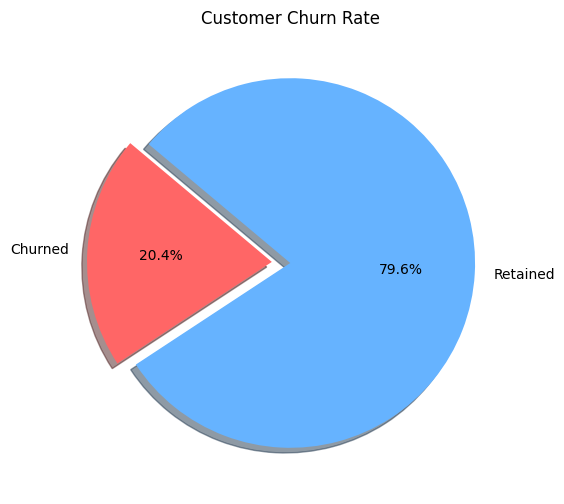

In [ ]:
churned = df[df['Exited'] == 1]['Exited'].count()
total_ids = len(df['CustomerId'])
non_churned = total_ids - churned


labels = ['Churned', 'Retained']
sizes = [churned, non_churned]
colors = ['#ff6666', '#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Customer Churn Rate')
plt.show()


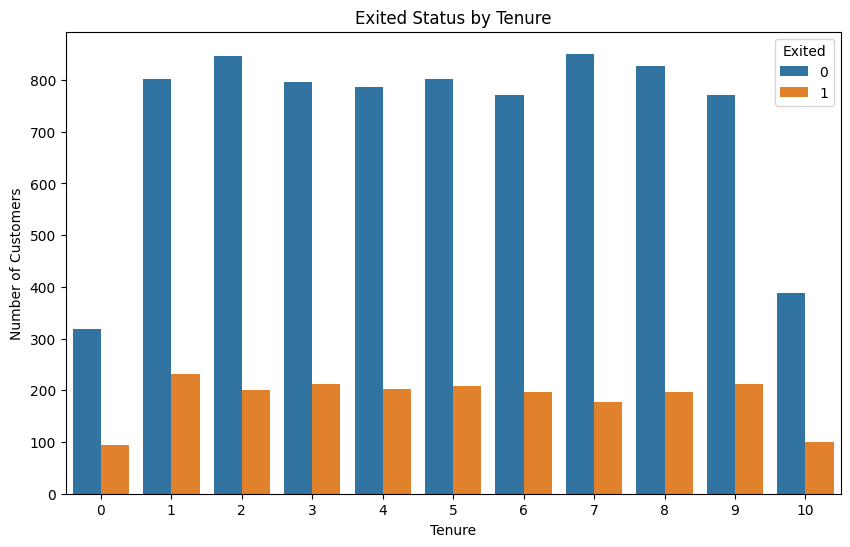

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Exited Status by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.show()

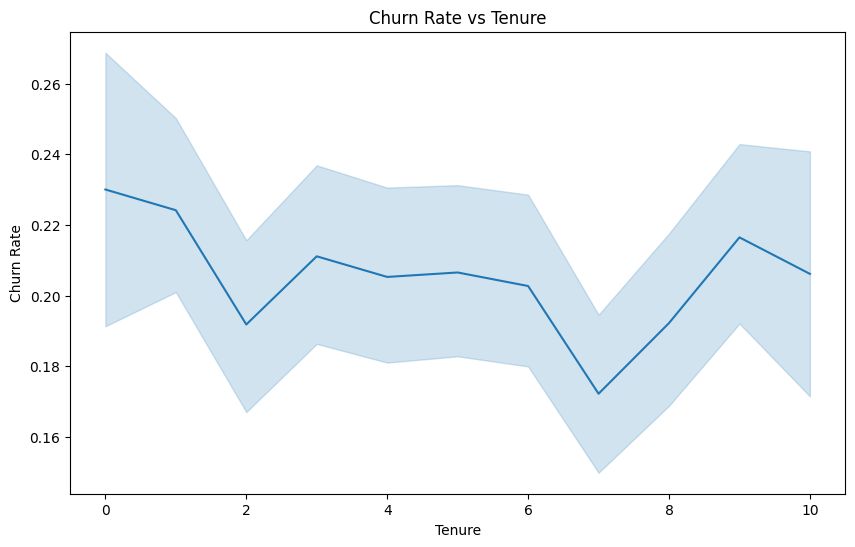

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure', y='Exited', data=df)
plt.title('Churn Rate vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.show()

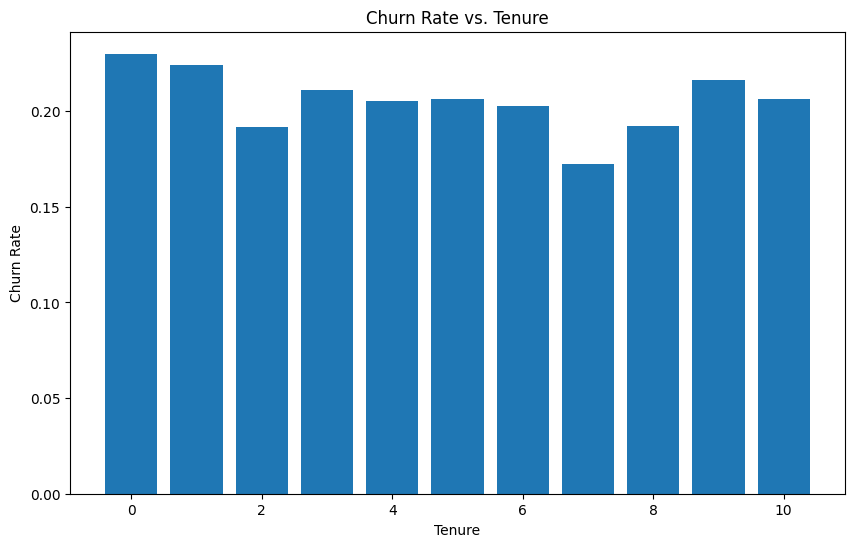

In [ ]:
plt.figure(figsize=(10, 6))

churn_rate_by_tenure = df.groupby('Tenure')['Exited'].mean()
plt.bar(churn_rate_by_tenure.index, churn_rate_by_tenure.values)
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Tenure')
plt.show()

According to the analysis, we see that the churn rate of the dataset, ie the % of people switching to other bank's services is 20.4%.


<ipython-input-19-f34aebe69292>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df[df['Exited'] == 1].groupby('AgeGroup')['Exited'].count() / df.groupby('AgeGroup')['Exited'].count() * 100


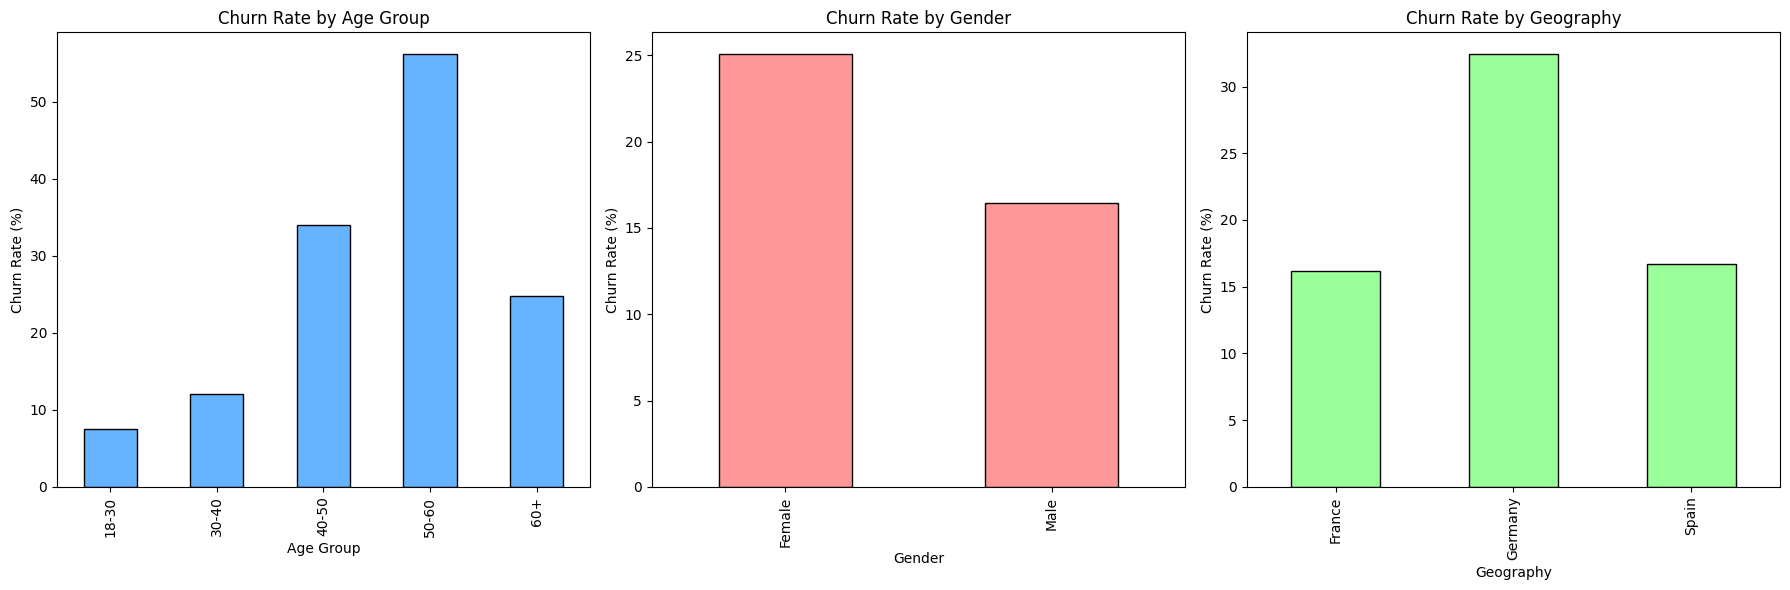

In [ ]:
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_churn = df[df['Exited'] == 1].groupby('AgeGroup')['Exited'].count() / df.groupby('AgeGroup')['Exited'].count() * 100

gender_churn = df[df['Exited'] == 1].groupby('Gender')['Exited'].count() / df.groupby('Gender')['Exited'].count() * 100

geography_churn = df[df['Exited'] == 1].groupby('Geography')['Exited'].count() / df.groupby('Geography')['Exited'].count() * 100

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

age_churn.plot(kind='bar', ax=axs[0], color='#66b3ff', edgecolor='black')
axs[0].set_title('Churn Rate by Age Group')
axs[0].set_ylabel('Churn Rate (%)')
axs[0].set_xlabel('Age Group')

gender_churn.plot(kind='bar', ax=axs[1], color='#ff9999', edgecolor='black')
axs[1].set_title('Churn Rate by Gender')
axs[1].set_ylabel('Churn Rate (%)')
axs[1].set_xlabel('Gender')


geography_churn.plot(kind='bar', ax=axs[2], color='#99ff99', edgecolor='black')
axs[2].set_title('Churn Rate by Geography')
axs[2].set_ylabel('Churn Rate (%)')
axs[2].set_xlabel('Geography')

plt.tight_layout()
plt.show()


<ipython-input-20-ad2d21c80dfe>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Geography', columns=['Gender', 'AgeGroup'], values='Exited', aggfunc='count')


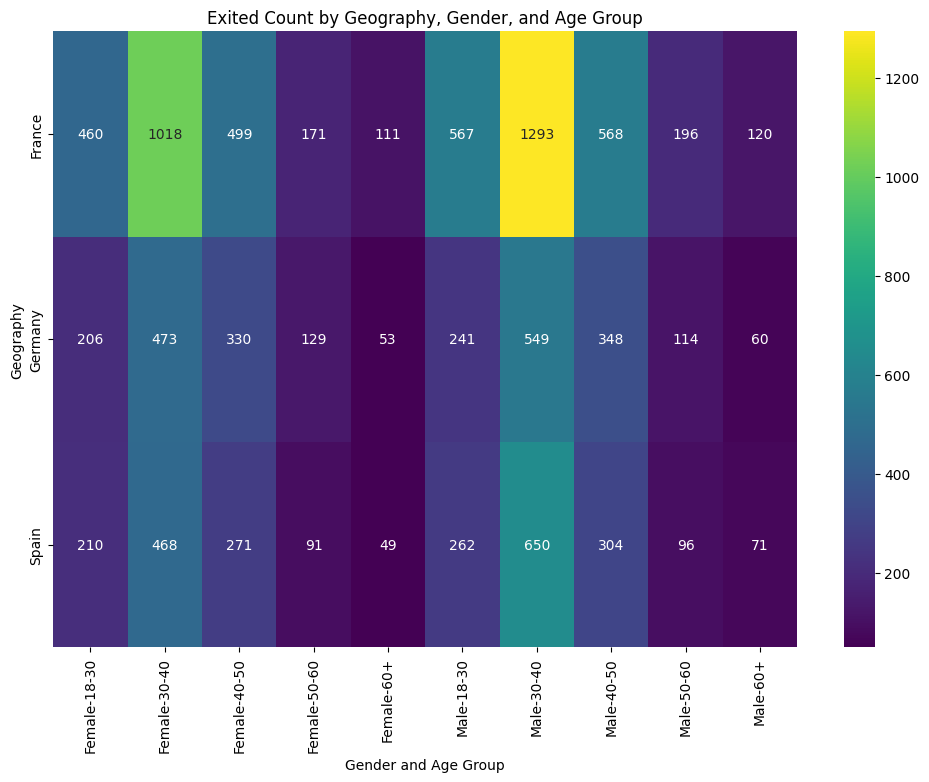

In [ ]:
heatmap_data = df.pivot_table(index='Geography', columns=['Gender', 'AgeGroup'], values='Exited', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Exited Count by Geography, Gender, and Age Group')
plt.xlabel('Gender and Age Group')
plt.ylabel('Geography')
plt.show()


<ipython-input-21-3cc7f88a955a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(['Geography', 'Gender', 'AgeGroup'])['Exited'].mean().reset_index()


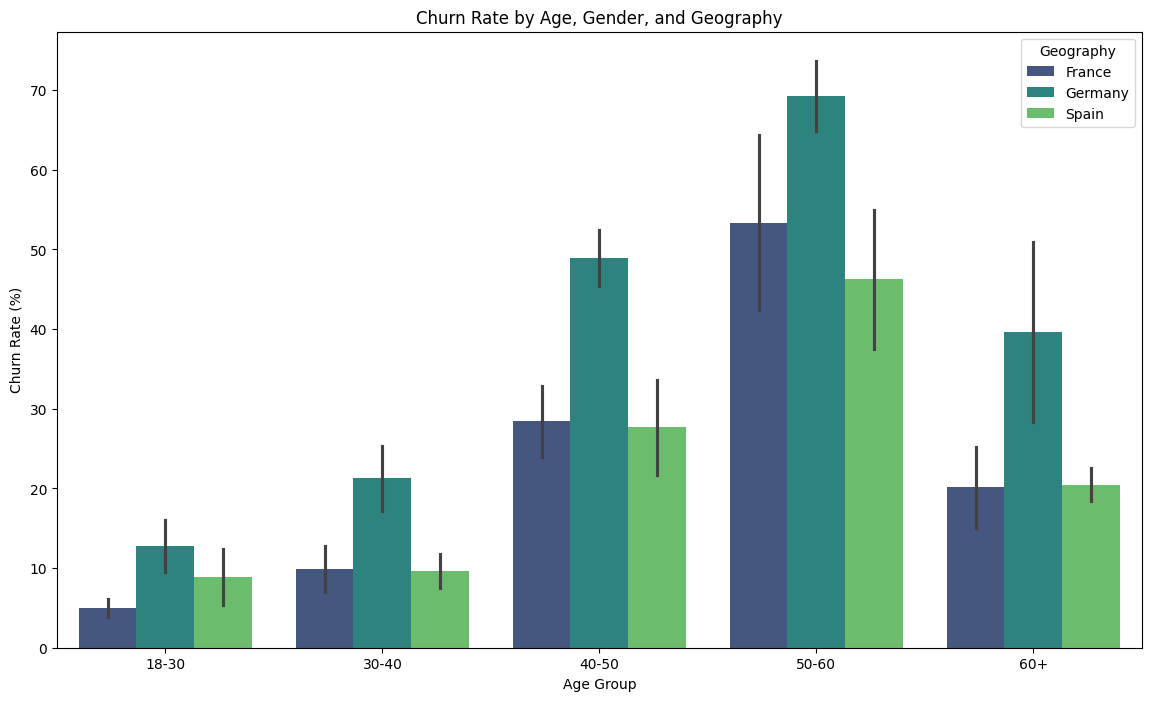

In [ ]:
churn_rate = df.groupby(['Geography', 'Gender', 'AgeGroup'])['Exited'].mean().reset_index()
churn_rate['Exited'] = churn_rate['Exited'] * 100

plt.figure(figsize=(14, 8))
sns.barplot(data=churn_rate, x='AgeGroup', y='Exited', hue='Geography', palette='viridis')
plt.title('Churn Rate by Age, Gender, and Geography')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Geography')
plt.show()

In [ ]:
france_customers = df[(df['Geography'] == 'France') &
                      (df['CreditScore'] > 500) &
                      (df['EstimatedSalary'] > 120000) &
                      (df['HasCrCard'] == 1)]

print("Number of target customers in France:", len(france_customers))
print(france_customers.head())

Number of target customers in France: 1290
    CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  Balance  \
20    15577657  McDonald          732    France    Male   41       8      0.0   
24    15625047       Yen          846    France  Female   38       5      0.0   
76    15614049        Hu          664    France    Male   55       8      0.0   
77    15662085      Read          678    France  Female   32       9      0.0   
81    15663706   Leonard          777    France  Female   32       2      0.0   

    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited AgeGroup  
20              2          1               1        170886.17       0    40-50  
24              1          1               1        187616.16       0    30-40  
76              2          1               1        139161.64       0    50-60  
77              1          1               1        148210.64       0    30-40  
81              1          1               0        136458.19    

In [ ]:
france_customers.shape


(1290, 14)

In [ ]:
france_customers .to_excel("france_customers.xlsx", index=False)

print("Data saved to dataset.xlsx")

Data saved to dataset.xlsx


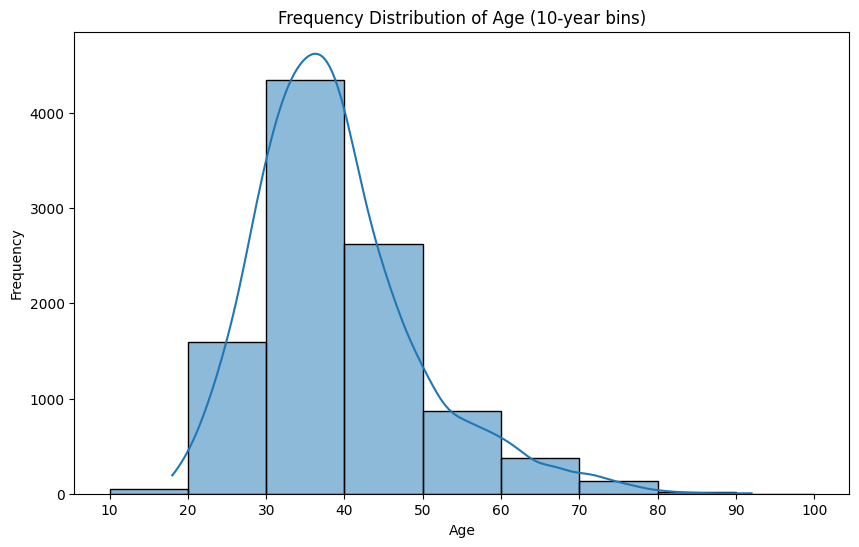

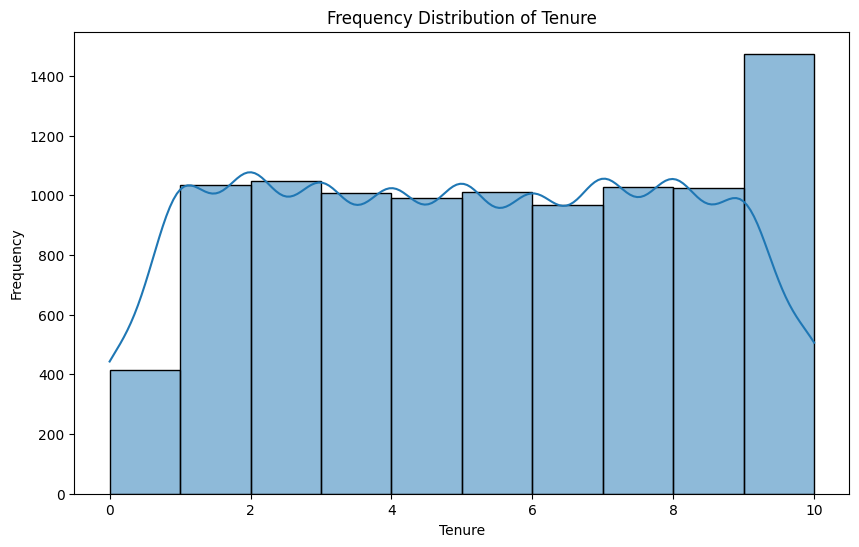

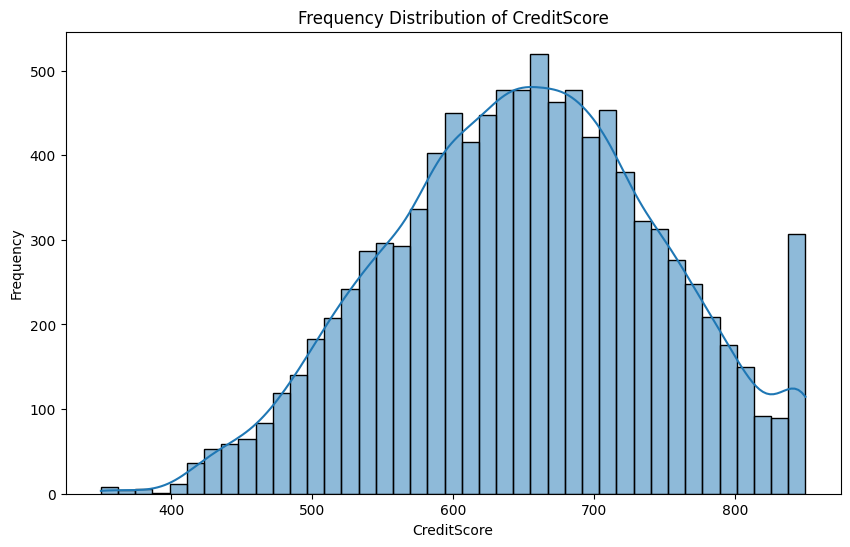

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=range(10, 101, 10), kde=True)
plt.title('Frequency Distribution of Age (10-year bins)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(10, 101, 10))
plt.show()



plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=range(0, 11, 1), kde=True)
plt.title('Frequency Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], kde=True)
plt.title('Frequency Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Quetion 4

In [ ]:
new_df = df[['CustomerId', 'CreditScore', 'Balance', 'Exited']]
print(new_df.head())

   CustomerId  CreditScore    Balance  Exited
0    15634602          619       0.00       1
1    15647311          608   83807.86       0
2    15619304          502  159660.80       1
3    15701354          699       0.00       0
4    15737888          850  125510.82       0


<ipython-input-28-b008ba6995f9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_exited_counts = df[df['Exited'] == 1].groupby('CreditScoreRange')['Exited'].count()


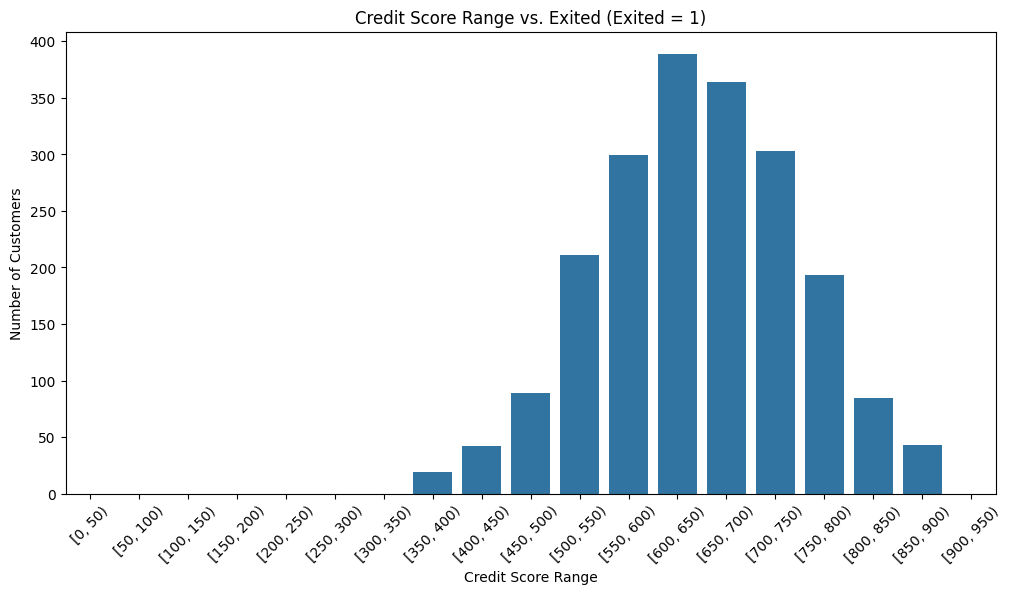

In [ ]:
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=range(0, 1000, 50), right=False)
credit_score_exited_counts = df[df['Exited'] == 1].groupby('CreditScoreRange')['Exited'].count()
plt.figure(figsize=(12, 6))
sns.barplot(x=credit_score_exited_counts.index.astype(str), y=credit_score_exited_counts.values)
plt.title('Credit Score Range vs. Exited (Exited = 1)')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-c0d895453ca9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_exited_counts = df[df['Exited'] == 1].groupby('BalanceGroup')['Exited'].count()


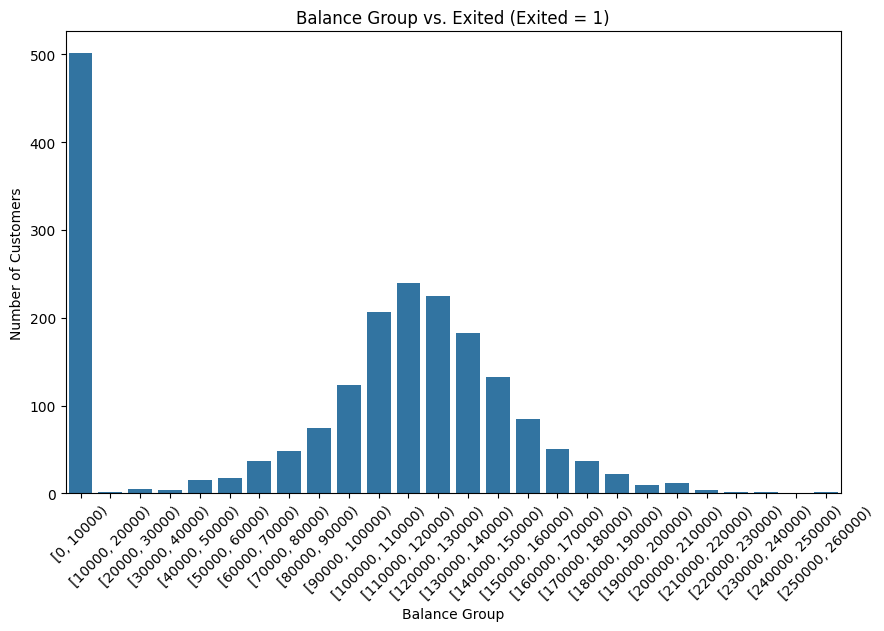

In [ ]:
df['BalanceGroup'] = pd.cut(df['Balance'], bins=range(0, int(df['Balance'].max()) + 10000, 10000), right=False)
balance_exited_counts = df[df['Exited'] == 1].groupby('BalanceGroup')['Exited'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=balance_exited_counts.index.astype(str), y=balance_exited_counts.values)
plt.title('Balance Group vs. Exited (Exited = 1)')
plt.xlabel('Balance Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-6142fd3c18e2>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_by_credit_score = df.groupby('CreditScoreGroup')['Balance'].mean()


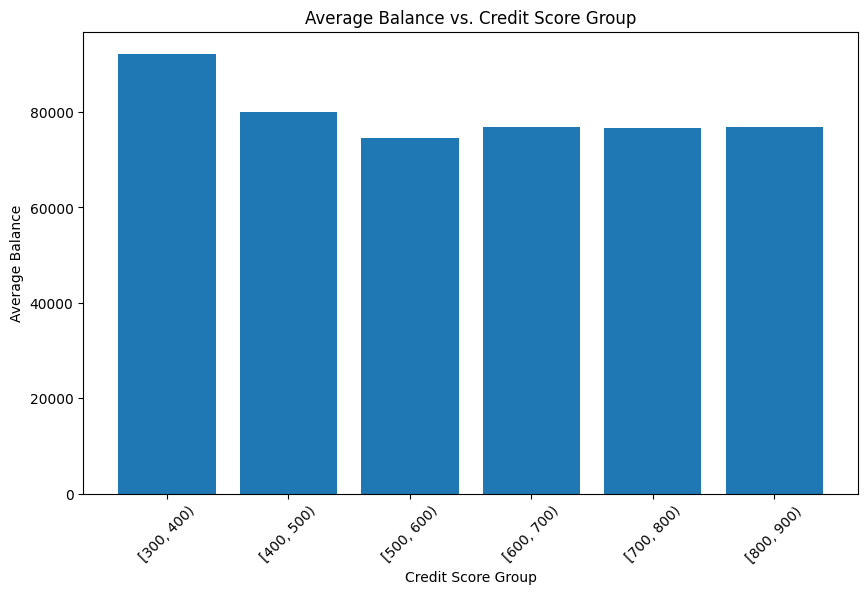

In [ ]:

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=range(300, 901, 100), right=False)

balance_by_credit_score = df.groupby('CreditScoreGroup')['Balance'].mean()


plt.figure(figsize=(10, 6))
plt.bar(balance_by_credit_score.index.astype(str), balance_by_credit_score.values)
plt.title('Average Balance vs. Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-b622abb4957a>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_by_credit_geo = df.groupby(['CreditScoreGroup', 'Geography'])['Balance'].mean().reset_index()


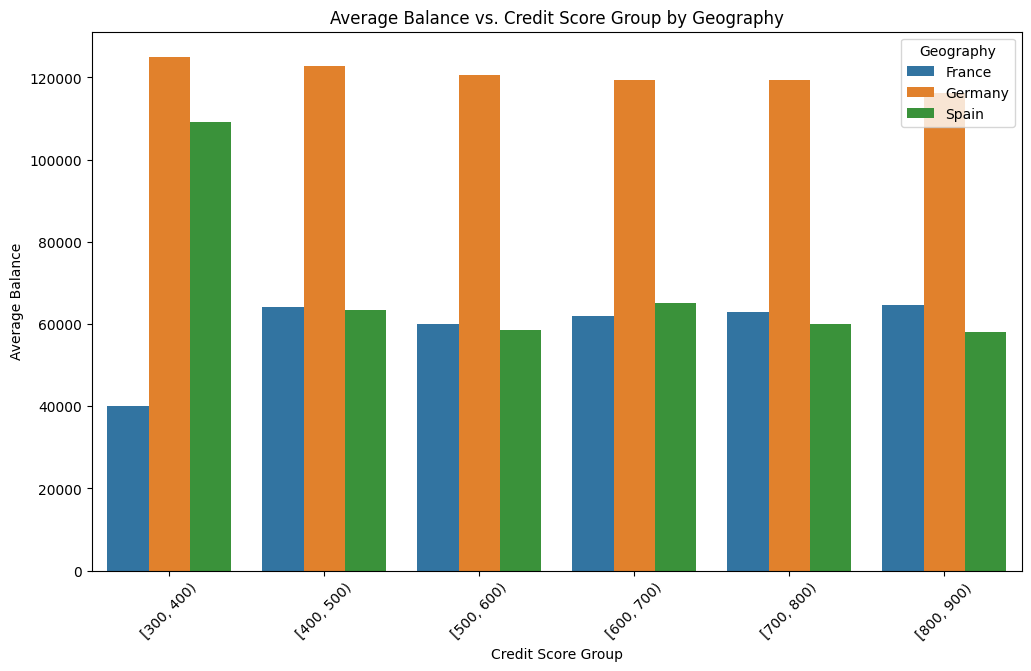

In [ ]:


df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=range(300, 901, 100), right=False)


balance_by_credit_geo = df.groupby(['CreditScoreGroup', 'Geography'])['Balance'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=balance_by_credit_geo, x='CreditScoreGroup', y='Balance', hue='Geography')
plt.title('Average Balance vs. Credit Score Group by Geography')
plt.xlabel('Credit Score Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.legend(title='Geography')
plt.show()



<ipython-input-32-5819f979009a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['CreditScoreRange', 'BalanceRange'])['Exited'].sum().unstack()


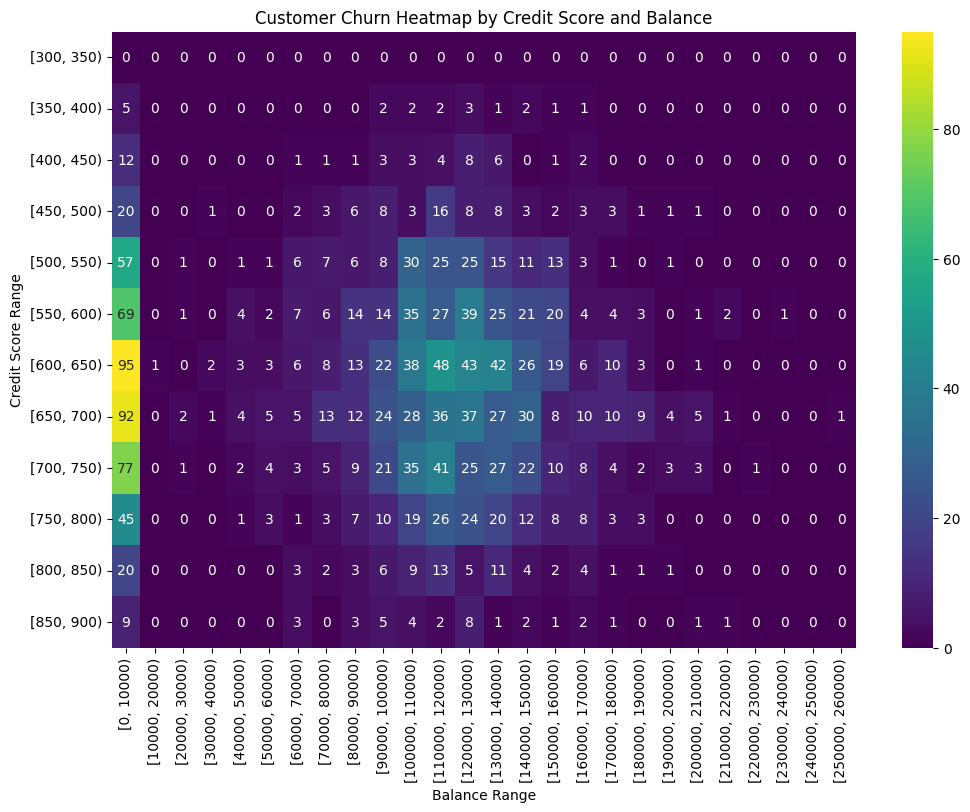

In [ ]:
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=range(300, 901, 50), right=False)
df['BalanceRange'] = pd.cut(df['Balance'], bins=range(0, int(df['Balance'].max()) + 10000, 10000), right=False)
heatmap_data = df.groupby(['CreditScoreRange', 'BalanceRange'])['Exited'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Customer Churn Heatmap by Credit Score and Balance')
plt.xlabel('Balance Range')
plt.ylabel('Credit Score Range')
plt.show()

In [ ]:
#Question 5

In [ ]:
at_risk_customers = df[
    (df['CreditScore'] < 600) &
    (df['Age'] > 50) &
    (df['Balance'] > 100000) &
    (df['IsActiveMember'] == 0) &
    (df['NumOfProducts'] <= 1) &
    (df['Exited'] == 0)
]

at_risk_count = at_risk_customers.shape[0]
print(f"The number of 'At-Risk' customers is: {at_risk_count}")


The number of 'At-Risk' customers is: 5


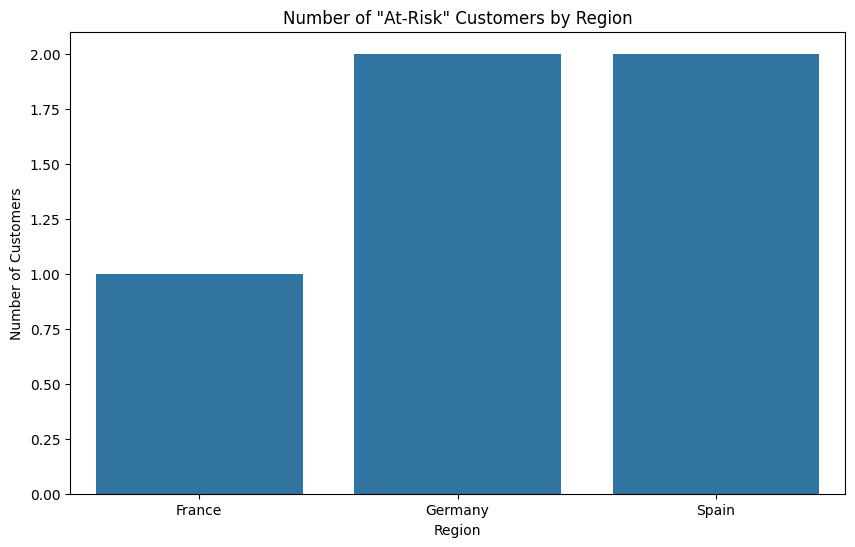

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=at_risk_customers)
plt.title('Number of "At-Risk" Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-35-6b85c25a727b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_customers['AgeGroup'] = pd.cut(at_risk_customers['Age'], bins=range(0, 100, 10), right=False)


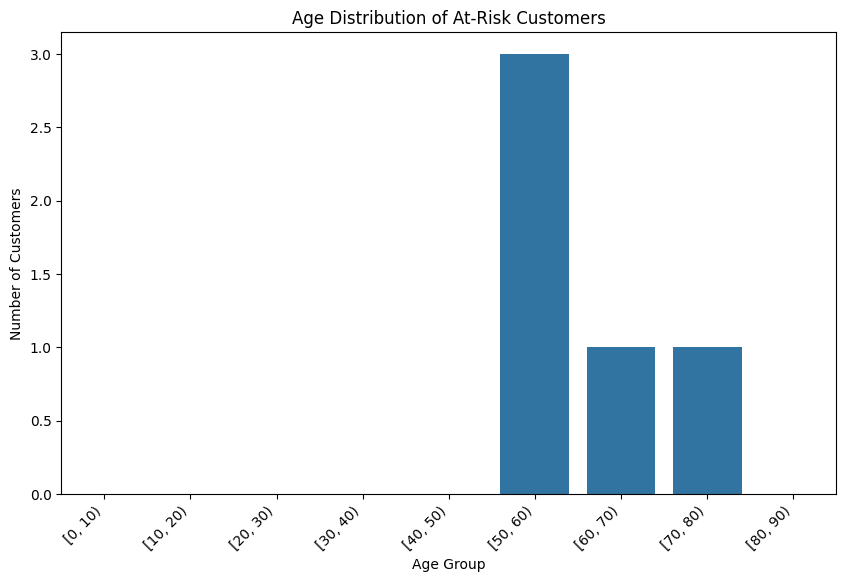

In [ ]:
at_risk_customers['AgeGroup'] = pd.cut(at_risk_customers['Age'], bins=range(0, 100, 10), right=False)

plt.figure(figsize=(10, 6))

sns.countplot(x='AgeGroup', data=at_risk_customers)
plt.title('Age Distribution of At-Risk Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
at_risk_no_credit_card = at_risk_customers[at_risk_customers['HasCrCard'] == 0].shape[0]

print(f"Number of 'At-Risk' customers without a credit card: {at_risk_no_credit_card}")

Number of 'At-Risk' customers without a credit card: 1


In [ ]:
#Question 7: Discuss the correlation of the following attributes with Churn : Tenure, Age, Estimated Salary, Balance, Credit Score, NumOfProducts. Also give insights for each attribute.

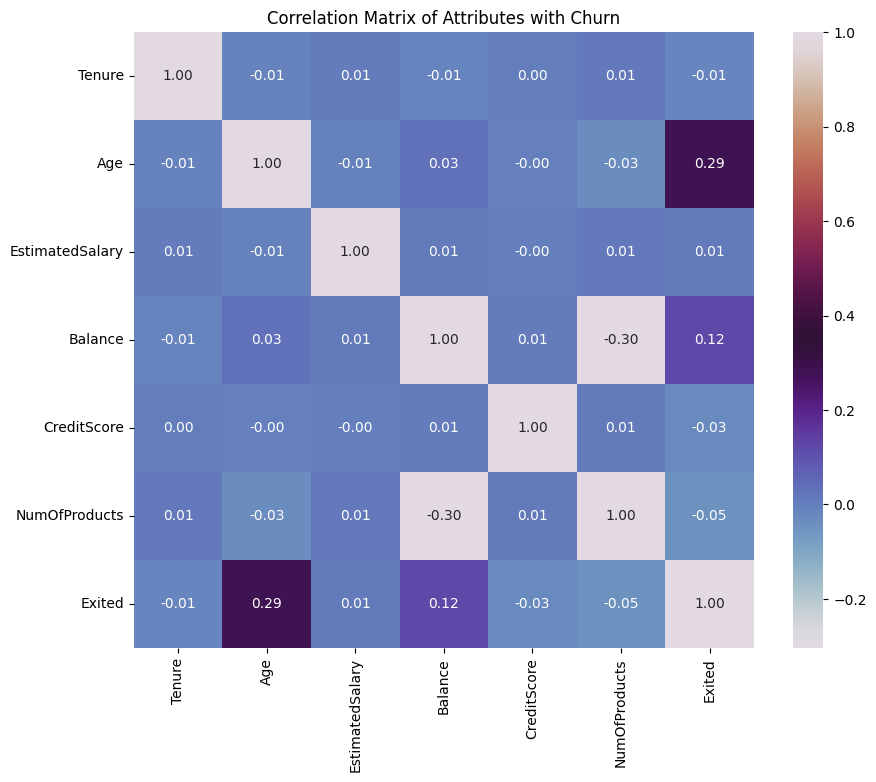

In [ ]:
correlations = df[['Tenure', 'Age', 'EstimatedSalary', 'Balance', 'CreditScore', 'NumOfProducts', 'Exited']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Matrix of Attributes with Churn')
plt.show()

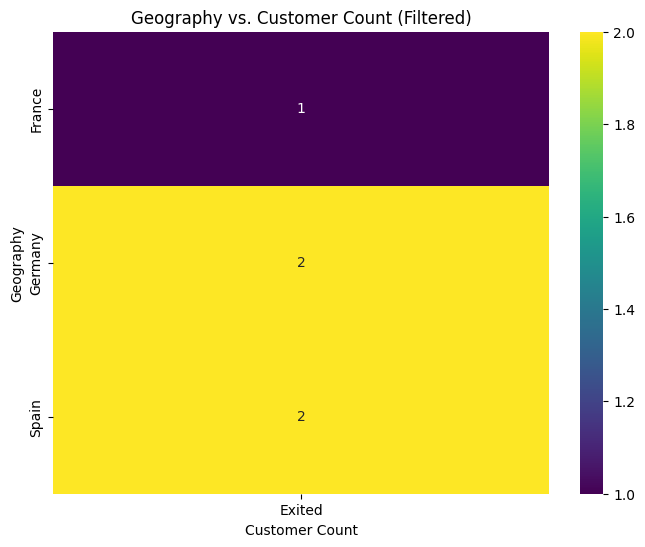

In [ ]:
filtered_df = df[(df['CreditScore'] < 600) &
                 (df['Age'] > 50) &
                 (df['Balance'] > 100000) &
                 (df['IsActiveMember'] == 0) &
                 (df['NumOfProducts'] <= 1) &
                 (df['Exited'] == 0)]

plt.figure(figsize=(8, 6))
heatmap_data = filtered_df.pivot_table(index='Geography', values='Exited', aggfunc='count')
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Geography vs. Customer Count (Filtered)')
plt.xlabel('Customer Count')
plt.ylabel('Geography')
plt.show()

In [ ]:
from google.colab import files
filtered_df.to_excel('filtered_df.xlsx', index=False)
files.download('filtered_df.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['CLV'] = df['Tenure'] * df['EstimatedSalary']
total_value_non_churned = df[df['Exited'] == 0]['CLV'].sum()

print(f"Total value still with the bank (non-churned): {total_value_non_churned}")

Total value still with the bank (non-churned): 3994840162.1099997


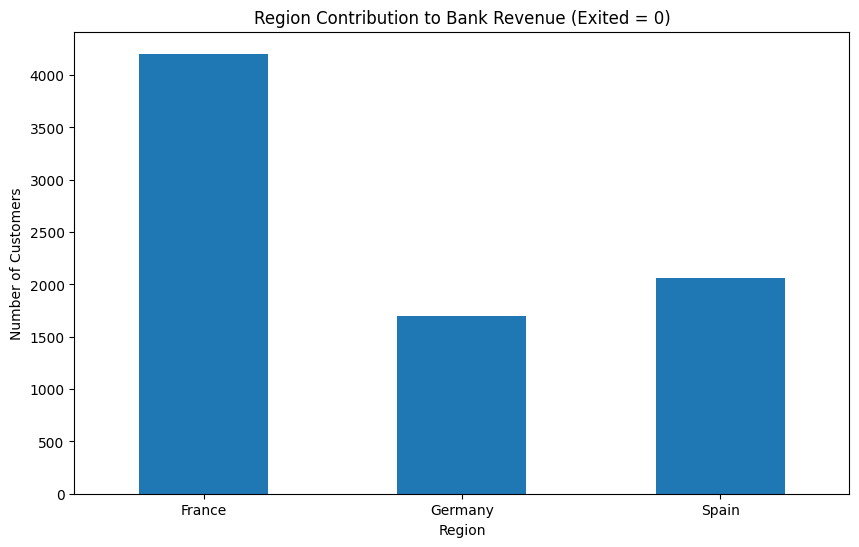

In [ ]:
non_churned_customers = df[df['Exited'] == 0]
region_counts = non_churned_customers.groupby('Geography')['Exited'].count()

plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.title('Region Contribution to Bank Revenue (Exited = 0)')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

The correlation between Credit Score and CLV is: 0.00010957812843284677


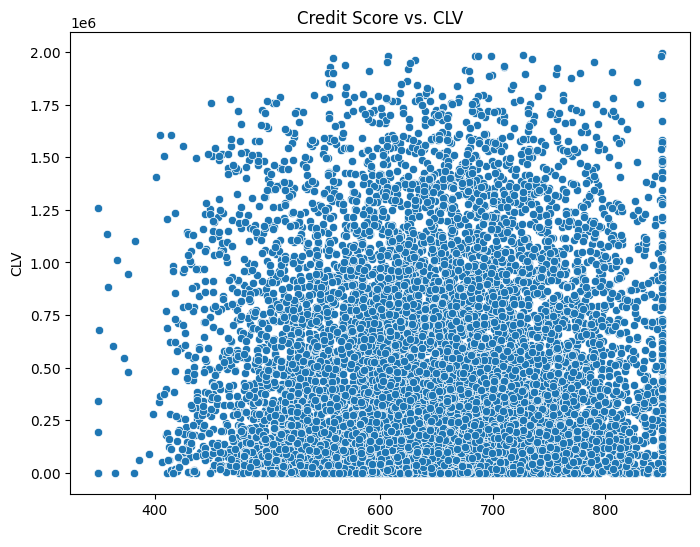

In [ ]:
correlation = df['CreditScore'].corr(df['CLV'])

print(f"The correlation between Credit Score and CLV is: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='CreditScore', y='CLV', data=df)
plt.title('Credit Score vs. CLV')
plt.xlabel('Credit Score')
plt.ylabel('CLV')
plt.show()

<ipython-input-43-e38873124bf2>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_by_credit_score = df.groupby('CreditScoreGroup')['CLV'].mean()


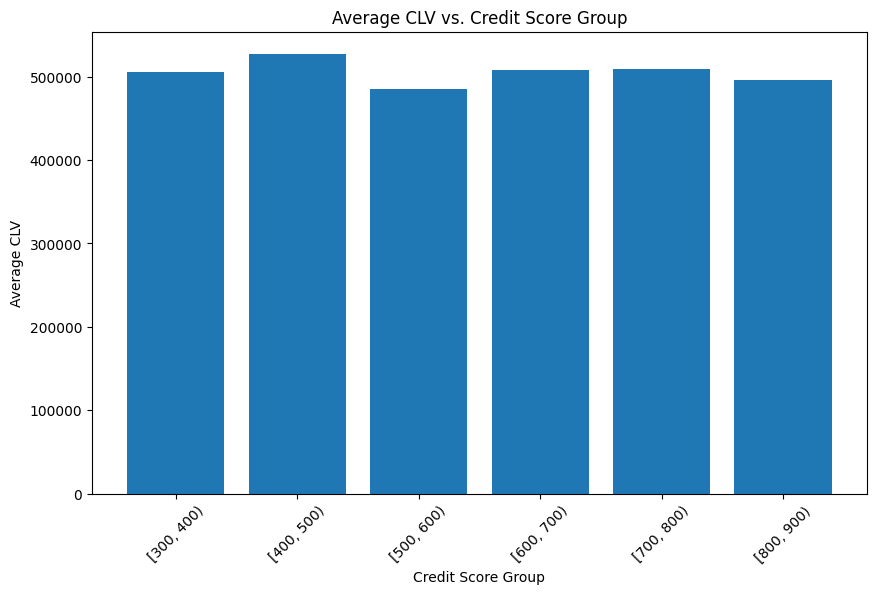

In [ ]:
df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=range(300, 901, 100), right=False)

clv_by_credit_score = df.groupby('CreditScoreGroup')['CLV'].mean()

plt.figure(figsize=(10, 6))
plt.bar(clv_by_credit_score.index.astype(str), clv_by_credit_score.values)
plt.title('Average CLV vs. Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Average CLV')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100],
                       labels=['<30', '30-39', '40-49', '50-59', '60+'])


def plot_clv_distribution(age_group, region):
    filtered_df = df[(df['AgeGroup'] == age_group) & (df['Geography'] == region)]
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_df['CLV'], kde=True)
    plt.title(f'CLV Distribution for Age Group {age_group} in {region}')
    plt.xlabel('CLV')
    plt.ylabel('Frequency')
    plt.show()


age_group_widget = widgets.Dropdown(
    options=df['AgeGroup'].unique(),
    value=df['AgeGroup'].unique()[0],
    description='Age Group:',
)

region_widget = widgets.Dropdown(
    options=df['Geography'].unique(),
    value=df['Geography'].unique()[0],
    description='Region:',
)



interact(plot_clv_distribution, age_group=age_group_widget, region=region_widget);

interactive(children=(Dropdown(description='Age Group:', options=('40-49', '30-39', '<30', '50-59', '60+'), va…

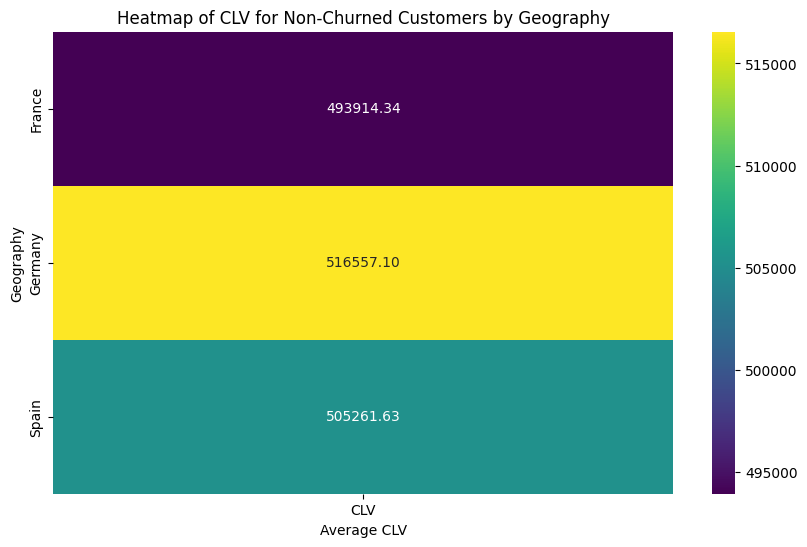

In [ ]:



plt.figure(figsize=(10, 6))
non_churned_df = df[df['Exited'] == 0]
heatmap_data = non_churned_df.pivot_table(index='Geography', values='CLV', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of CLV for Non-Churned Customers by Geography')
plt.xlabel('Average CLV')
plt.ylabel('Geography')
plt.show()

In [ ]:
print(df['CLV'])

0        202697.76
1        112542.58
2        911452.56
3         93826.63
4        158168.20
           ...    
9995     481353.20
9996    1016997.70
9997     294599.06
9998     278665.56
9999     152763.12
Name: CLV, Length: 10000, dtype: float64


<ipython-input-46-43c2f4e1cee3>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='CLV', index='Geography', columns='AgeGroup', aggfunc='mean')


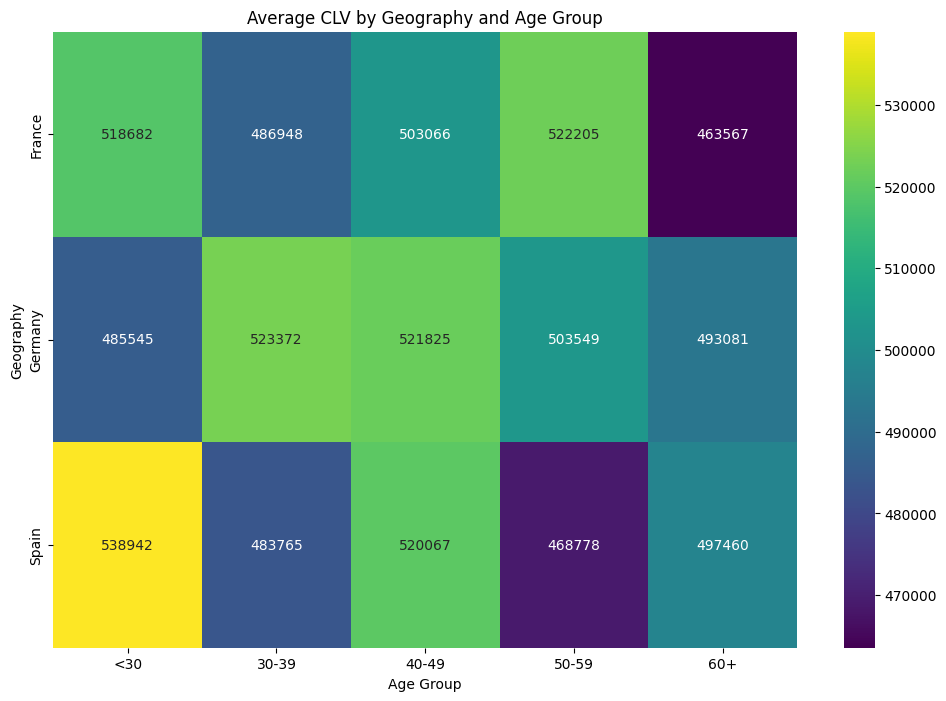

In [ ]:
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(values='CLV', index='Geography', columns='AgeGroup', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis')
plt.title('Average CLV by Geography and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Geography')
plt.show()

In [ ]:

from google.colab import files
france_customers.to_excel('france_customers.xlsx', index=False)
files.download('france_customers.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-49-e0cfd9847691>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_summary = df.groupby(['CreditScoreSegment', 'BalanceSegment', 'Geography'])['Exited'].agg(['mean', 'count']).reset_index()
<ipython-input-49-e0cfd9847691>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_segment = df.groupby('CreditScoreSegment')['Balance'].mean().reset_index()


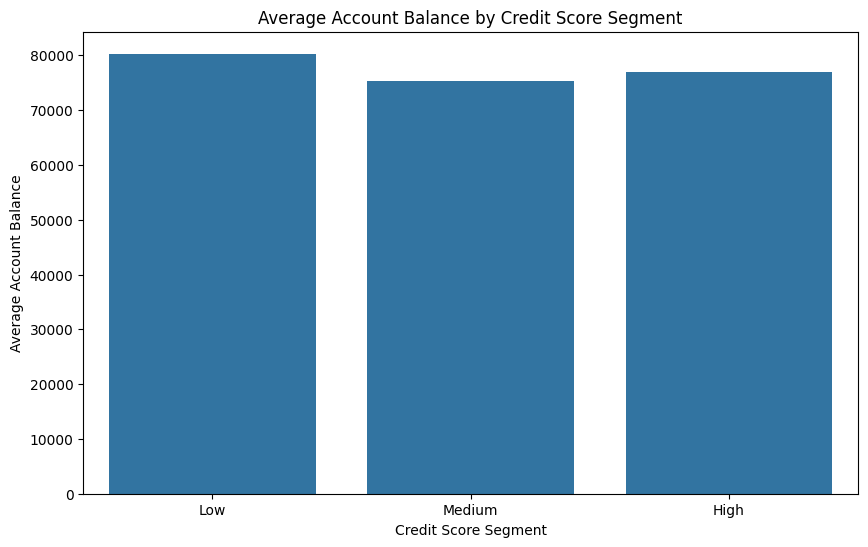

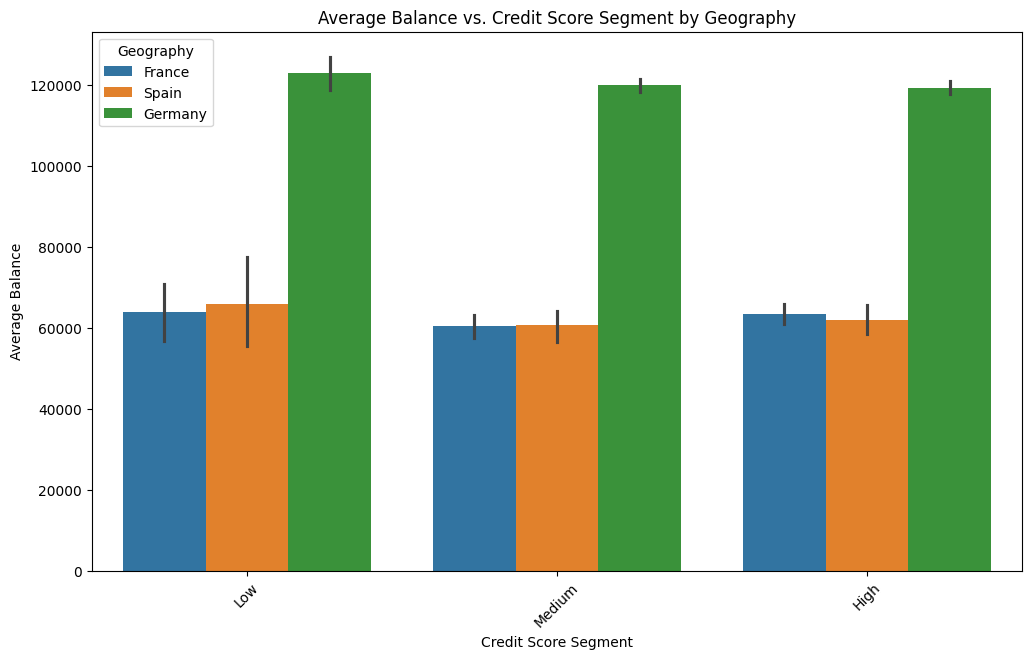

   CreditScoreSegment BalanceSegment Geography  ChurnRate  CustomerCount
0                 Low            Low    France  20.129870            154
1                 Low            Low   Germany        NaN              0
2                 Low            Low     Spain   9.836066             61
3                 Low         Medium    France  25.000000             12
4                 Low         Medium   Germany  14.285714              7
5                 Low         Medium     Spain  28.571429              7
6                 Low           High    France  15.909091            132
7                 Low           High   Germany  40.287770            139
8                 Low           High     Spain  27.450980             51
9                 Low      Very High    France  28.571429             28
10                Low      Very High   Germany  15.384615             26
11                Low      Very High     Spain  25.000000             12
12             Medium            Low    France  14.

,CreditScoreSegment,Balance
0,Low,80294.231329
1,Medium,75357.821837
2,High,76873.685979


In [ ]:
df['CreditScoreSegment'] = pd.cut(df['CreditScore'], bins=[300, 500, 650, 850], labels=['Low', 'Medium', 'High'], right=False)
df['BalanceSegment'] = pd.cut(df['Balance'], bins=[0, 25000, 75000, 150000, 200000], labels=['Low', 'Medium', 'High', 'Very High'], right=False)


churn_summary = df.groupby(['CreditScoreSegment', 'BalanceSegment', 'Geography'])['Exited'].agg(['mean', 'count']).reset_index()
churn_summary.rename(columns={'mean': 'ChurnRate', 'count':'CustomerCount'}, inplace=True)
churn_summary['ChurnRate'] = churn_summary['ChurnRate'] * 100


avg_balance_by_segment = df.groupby('CreditScoreSegment')['Balance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CreditScoreSegment', y='Balance', data=avg_balance_by_segment)
plt.title('Average Account Balance by Credit Score Segment')
plt.xlabel('Credit Score Segment')
plt.ylabel('Average Account Balance')
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='CreditScoreSegment', y='Balance', hue='Geography')
plt.title('Average Balance vs. Credit Score Segment by Geography')
plt.xlabel('Credit Score Segment')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.legend(title='Geography')
plt.show()

print(churn_summary)
avg_balance_by_segment

<ipython-input-51-b531e1526700>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_summary = df.groupby(['CreditScoreSegment', 'BalanceSegment', 'Geography'])['Exited'].agg(['mean', 'count']).reset_index()


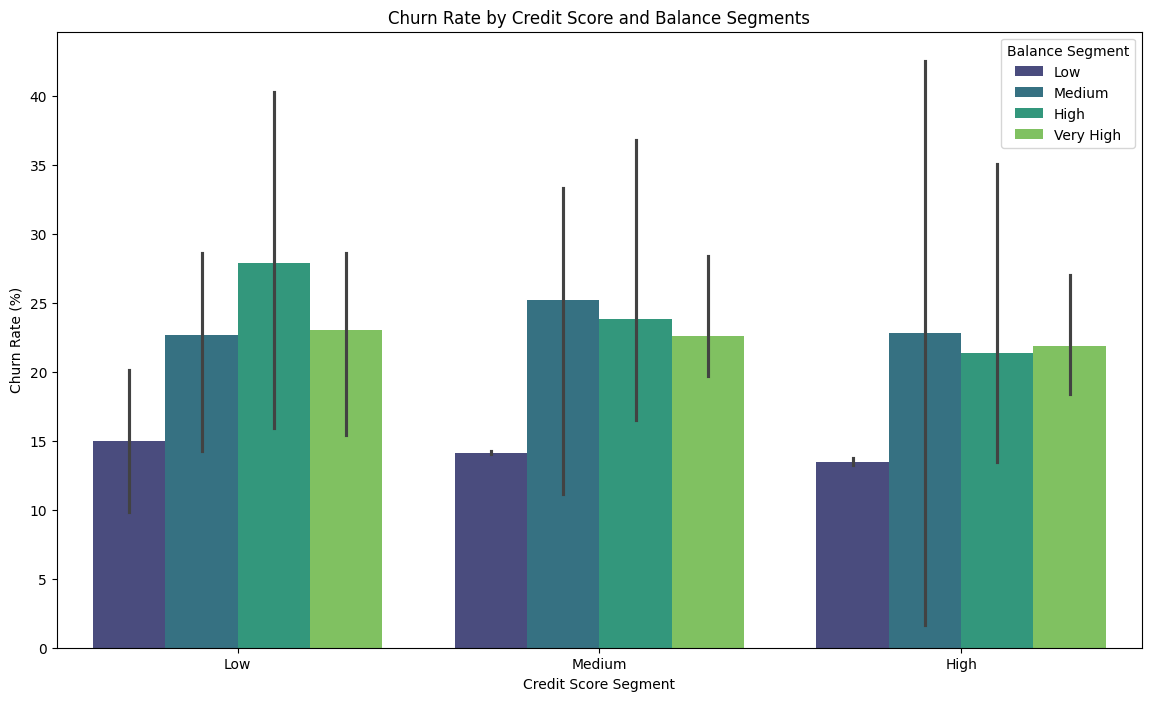

In [ ]:
df['CreditScoreSegment'] = pd.cut(df['CreditScore'], bins=[300, 500, 650, 850], labels=['Low', 'Medium', 'High'], right=False)
df['BalanceSegment'] = pd.cut(df['Balance'], bins=[0, 25000, 75000, 150000, 200000], labels=['Low', 'Medium', 'High', 'Very High'], right=False)


churn_summary = df.groupby(['CreditScoreSegment', 'BalanceSegment', 'Geography'])['Exited'].agg(['mean', 'count']).reset_index()
churn_summary.rename(columns={'mean': 'ChurnRate', 'count':'CustomerCount'}, inplace=True)
churn_summary['ChurnRate'] = churn_summary['ChurnRate'] * 100

plt.figure(figsize=(14, 8))
sns.barplot(data=churn_summary, x='CreditScoreSegment', y='ChurnRate', hue='BalanceSegment', palette='viridis')
plt.title('Churn Rate by Credit Score and Balance Segments')
plt.xlabel('Credit Score Segment')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Balance Segment')
plt.show()

<ipython-input-54-1500c2e7127d>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_segment = df.groupby('CreditScoreSegment')['Balance'].mean()


The credit score segment with the highest average account balance is: Low


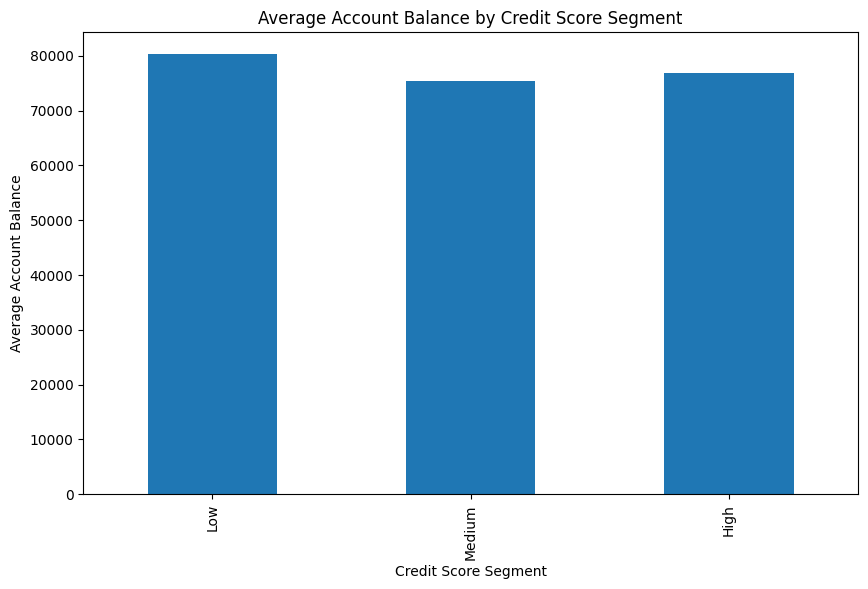

In [ ]:

df['CreditScoreSegment'] = pd.cut(df['CreditScore'], bins=[300, 500, 650, 850], labels=['Low', 'Medium', 'High'], right=False)


avg_balance_by_segment = df.groupby('CreditScoreSegment')['Balance'].mean()


highest_avg_balance_segment = avg_balance_by_segment.idxmax()

print(f"The credit score segment with the highest average account balance is: {highest_avg_balance_segment}")

plt.figure(figsize=(10, 6))
avg_balance_by_segment.plot(kind='bar')
plt.title('Average Account Balance by Credit Score Segment')
plt.xlabel('Credit Score Segment')
plt.ylabel('Average Account Balance')
plt.show()

<ipython-input-55-336a07ea789c>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_segment_geo = df.groupby(['CreditScoreSegment', 'Geography'])['Balance'].mean().reset_index()


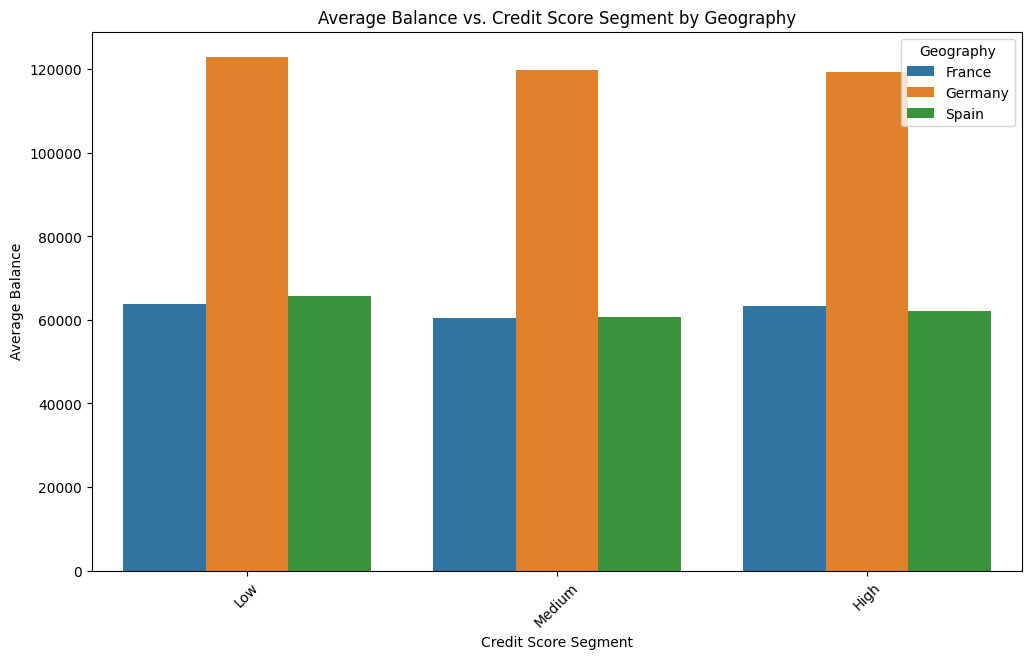

In [ ]:

df['CreditScoreSegment'] = pd.cut(df['CreditScore'], bins=[300, 500, 650, 850], labels=['Low', 'Medium', 'High'], right=False)

avg_balance_by_segment_geo = df.groupby(['CreditScoreSegment', 'Geography'])['Balance'].mean().reset_index()


plt.figure(figsize=(12, 7))
sns.barplot(data=avg_balance_by_segment_geo, x='CreditScoreSegment', y='Balance', hue='Geography')
plt.title('Average Balance vs. Credit Score Segment by Geography')
plt.xlabel('Credit Score Segment')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.legend(title='Geography')
plt.show()

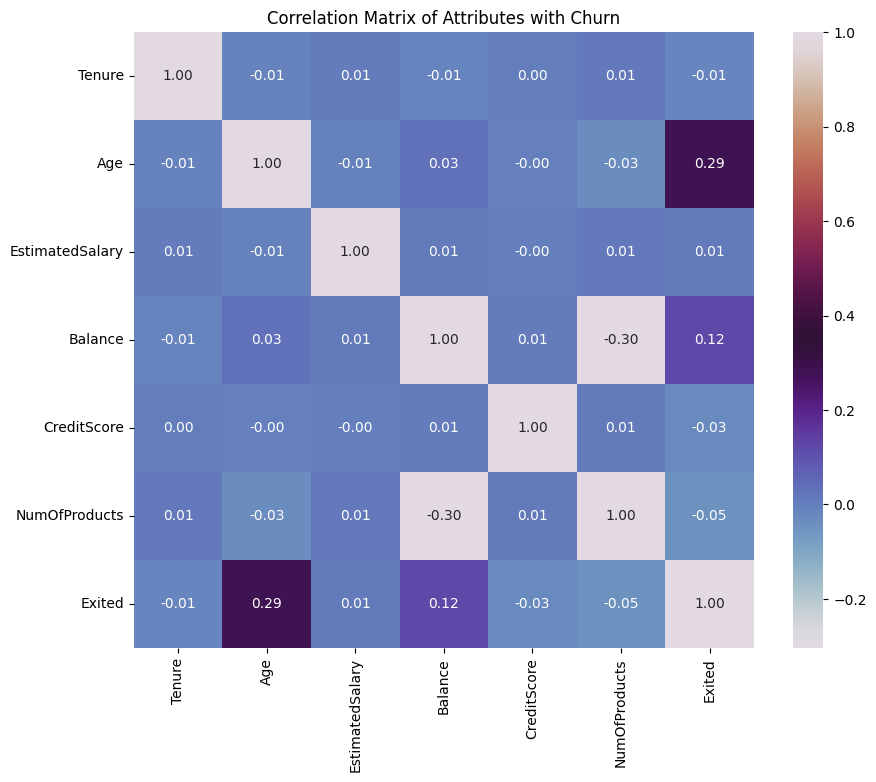

Tenure vs. Churn:
Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64


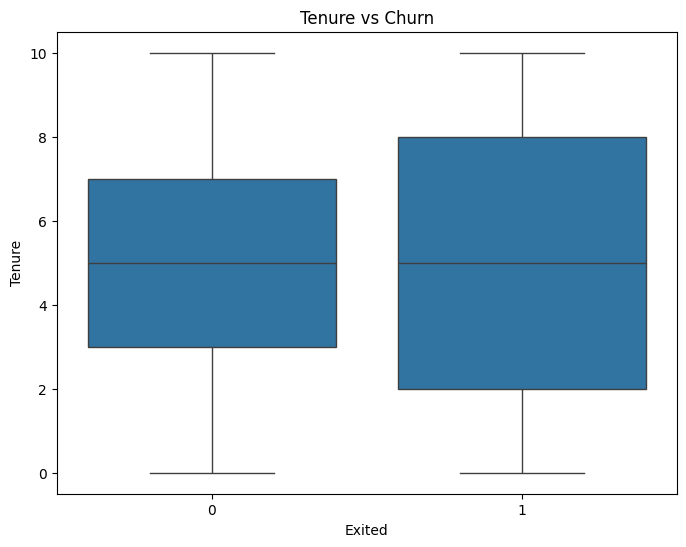


Age vs. Churn:
Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64


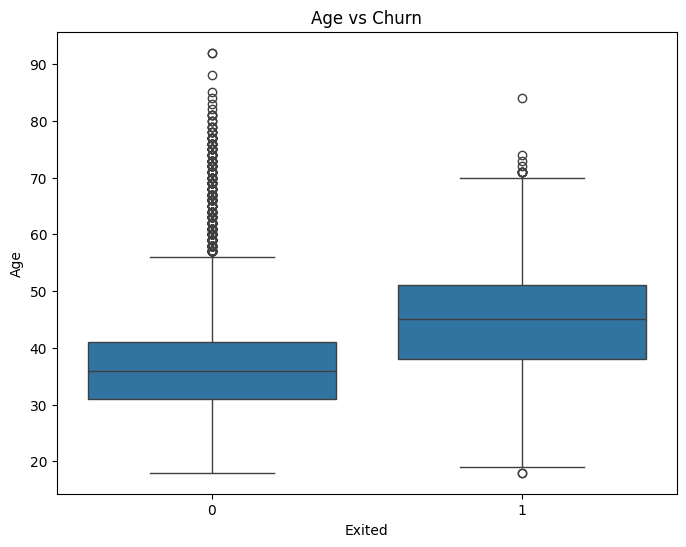


EstimatedSalary vs. Churn:
Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64


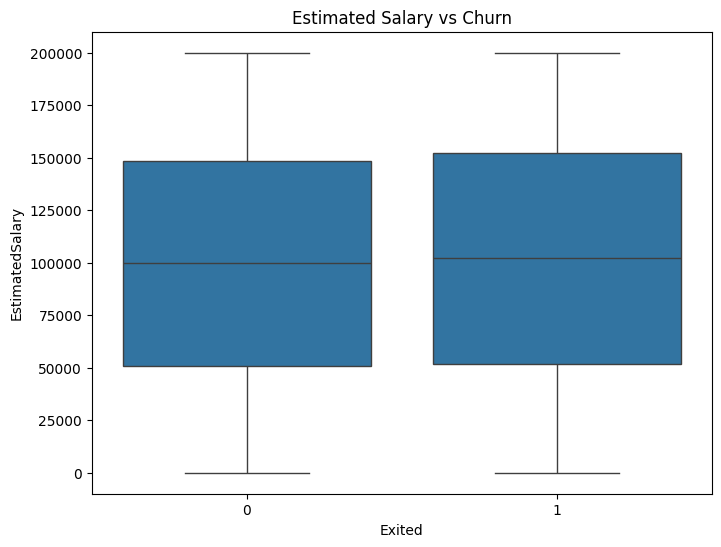


Balance vs. Churn:
Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


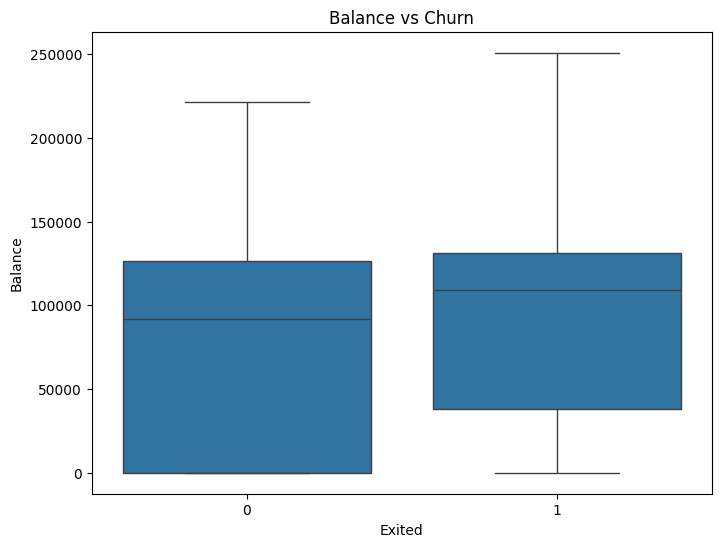


CreditScore vs. Churn:
Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


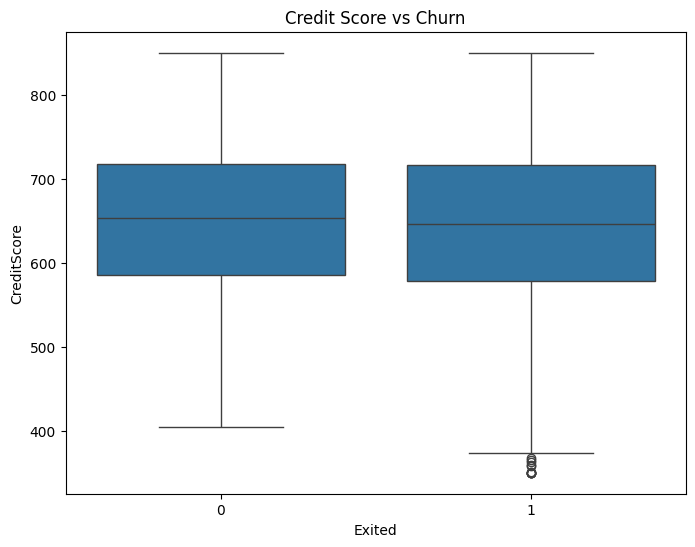


NumOfProducts vs. Churn:
Exited
0    1.544267
1    1.475209
Name: NumOfProducts, dtype: float64


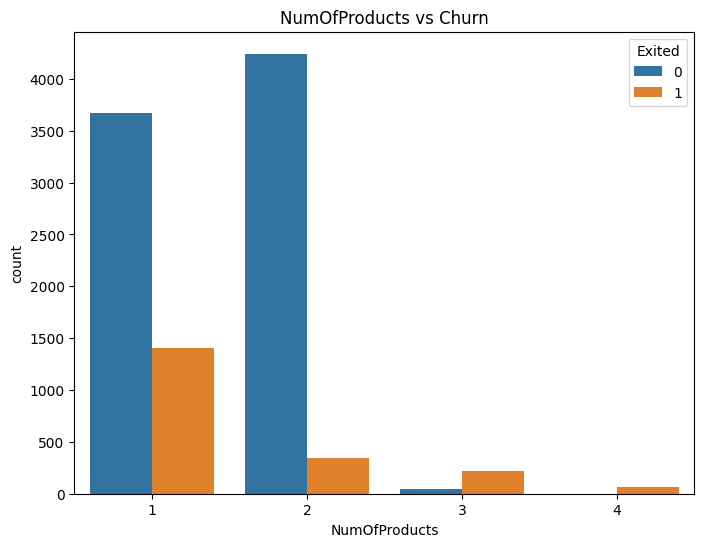

In [ ]:

correlations = df[['Tenure', 'Age', 'EstimatedSalary', 'Balance', 'CreditScore', 'NumOfProducts', 'Exited']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Matrix of Attributes with Churn')
plt.show()
print("Tenure vs. Churn:")
print(df.groupby('Exited')['Tenure'].mean())
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()
print("\nAge vs. Churn:")
print(df.groupby('Exited')['Age'].mean())
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()

print("\nEstimatedSalary vs. Churn:")
print(df.groupby('Exited')['EstimatedSalary'].mean())
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Churn')
plt.show()

print("\nBalance vs. Churn:")
print(df.groupby('Exited')['Balance'].mean())
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Churn')
plt.show()
print("\nCreditScore vs. Churn:")
print(df.groupby('Exited')['CreditScore'].mean())
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score vs Churn')
plt.show()
print("\nNumOfProducts vs. Churn:")
print(df.groupby('Exited')['NumOfProducts'].mean())
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('NumOfProducts vs Churn')
plt.show()



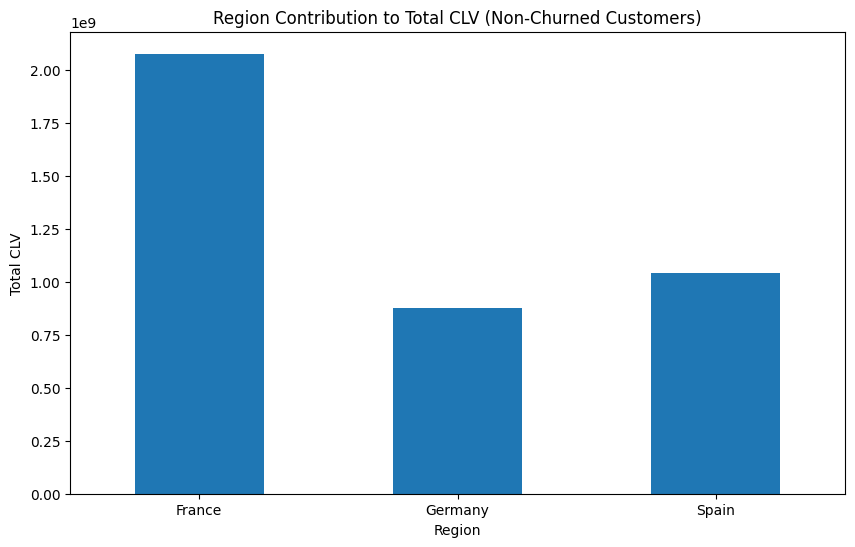

The region contributing most to the bank's revenue for non-churned customers is: France


In [ ]:
# prompt: Which region contribute most to the bank's revenue for non churned customers. analyse using charts

# Calculate the total CLV for non-churned customers in each region
region_clv = df[df['Exited'] == 0].groupby('Geography')['CLV'].sum()

# Create a bar plot to visualize the contribution of each region
plt.figure(figsize=(10, 6))
region_clv.plot(kind='bar')
plt.title('Region Contribution to Total CLV (Non-Churned Customers)')
plt.xlabel('Region')
plt.ylabel('Total CLV')
plt.xticks(rotation=0)
plt.show()

# Identify the region with the highest total CLV
highest_clv_region = region_clv.idxmax()
print(f"The region contributing most to the bank's revenue for non-churned customers is: {highest_clv_region}")